# Notæ 4

# Generación de grafos avanzados


En este notebook aprenderemos a construir grafos más avanzados, como por ejemplo orugas, langostas, de kneser, arco circulares y de intervalo. Al final del mismo, también veremos cómo construir grafos aleatorios para algunas de estas clases.

El objetivo es podes armar un dataset con diferentes grafos de prueba para probar los algoritmos de optimización que vayamos desarrollando.

Por lo pronto, comenzamos por importar el paquete <code>NetworkX</code>.

In [74]:
import networkx as nx

## Grafos orugas &#128027;

<b>Definición.</b> Un grafo oruga es un árbol en el cual todos los vértices se encuentran a distancia a lo sumo 1 de un camino central.

<b>Ejemplo.</b>

<p><a href="https://commons.wikimedia.org/wiki/File:Caterpillar_tree.svg#/media/File:Caterpillar_tree.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/b/b7/Caterpillar_tree.svg" alt="Caterpillar tree.svg" height="180" width="540"></p>

Existen muchas caracterizaciones equivalentes, por ejemplo, son árboles que luego de remover todas las hojas y las aristas incidentes en ellas se obtiene un camino.

Una forma de generar estos grafos es mediante una función <code>generar_oruga(patas)</code> donde <code>patas</code> es una lista de números enteros no negativos que representan la cantidad de vértices colgantes fuera del camino central (patas) que tiene cada vértice del camino central.

En el ejemplo anterior, el primer vértice tiene 0, el segundo tiene 0, el tercero 1, el cuarto 5, y así suceviamente...

In [120]:
patas = [0,0,1,5,0,2,4,0]

La idea es que <code>generar_oruga(patas)</code> construya un camino del largo de <code>patas</code> y, para cada vértice $i$ del camino, agregue a $i$ tantas aristas como colgantes tenga. Podemos aprovechar un truco de Python para facilitar el mapeo entre los vértices del camino y los índices de la lista. Disponemos de la función <code>enumerate</code> que permite iterar simultáneamente sobre los los índices y los elementos de una lista:

<code>for i, m in enumerate(lista):</code> 

donde <code>i</code> es el índice y <code>m</code> es el elemento de la lista. Por ejemplo:

In [121]:
for i, m in enumerate(colgantes):
    print(i,": ",m)

0 :  0
1 :  0
2 :  1
3 :  5
4 :  0
5 :  2
6 :  4
7 :  0


Por lo tanto, al vértice 0 le tenemos que agregar 0 colgantes, lo mismo al vértice 1, al vértice 2 le tenemos que agregar 1 colgante, y así sucesivamente. Lo único que resta es decidir qué identificador usar para los vértices colgantes. Para resolver esto, mantenemos una variable <code>v = n</code> con el identificador del próximo vértice a agregar (inicialemente los vértices del camino van del 0 al $n-1$ y $n$ es el primer identificador libre). Cada vez que agregamos un nuevo colgante, tenemos que avanzar en 1 el identificador.

In [122]:
def generar_oruga(patas):
    n = len(patas) # Nro. de vertices del camino central
    G = nx.path_graph(n) # Grafo camino
    v = n # Proximo vertice a agregar 
    for i, m in enumerate(patas):
        for j in range(m):
            G.add_edge(i,v)
            v += 1
    return G

Intentemos generar el grafo oruga de arriba.

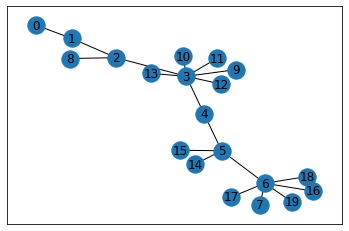

In [123]:
oruga = generar_oruga(patas)
nx.draw_networkx(oruga)

### &#x1f4bb;  Actividad 1 &#129438;

Usar la función <code>generar_oruga</code> para generar grafos a y b de la siguiente imagen.

<p><a href="https://images.app.goo.gl/aRxBbmCGRcnQXbVNA"><img src="https://d3i71xaburhd42.cloudfront.net/0edbdd27d6d2f6675c1b9783866474f4760d9c95/3-Figure3-1.png" alt="Caterpillar and lobster graphs.svg" height="141" width="794"></p>

In [136]:
### Espacio para completar Actividad 1

### &#x1f4bb;  Actividad 2 &#129438;


<p><a href="https://images.app.goo.gl/mBdeGYphanmdUkv39"><img src="https://brownsharpie.courtneygibbons.org/wp-content/comics/2007-04-30-lobster-tree-1.jpg" alt="Lobster joke.jpg" height="367" width="500"></p>


<b>Definición.</b> Un grafo langosta es un árbol en el cual todos los vértices se encuentran a distancia a lo sumo 2 de un camino central.
    
Notar que si en un grafo langosta se remueven todas las hojas y las aristas incidentes a ellas se obtiene un grafo oruga.

En esta actividad se propone escribir una función <code>generar_langosta(patas)</code> que genera un grafo langosta. En este caso, <code>patas</code> es una lista de listas de números enteros no negativos. Así entonces, del $i$-ésimo vértice del camino central cualgan tantos vértices como el largo de <code>patas[i]</code> y, del $j$-ésimo vértice que cuelga de $i$ cuelgan tantos vértices como el número almacenado en <code>patas[i][j]</code>. 
  
Veamos un ejemplo de construcción, supongamos la siguiente lista de listas de números.

In [137]:
patas = [[], [0], [3], [2,0,1]]

El grafo langosta correspondiente comienza por un camino de largo 4, pues patas tiene largo 4.

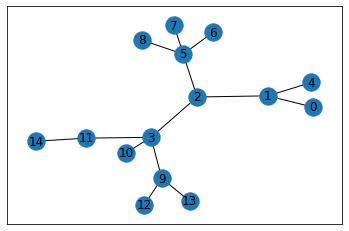

In [138]:
langosta = nx.path_graph(len(patas))

# Del vértice 0 no cuelga nada porque patas[0] es vacio

# Del vértice 1 cuelga un vértice 4 porque patas[1] tiene largo 1
langosta.add_edge(1,4)
# Del vértice 4 no cuelga nada porque patas[1][0] = 0

# Del vértice 2 cuelga un vértice 5 porque patas[2] tiene largo 1
langosta.add_edge(2,5)
# Del vértice 5 cuelgan tres vértices 6,7,8 porque patas[2][0] = 3
langosta.add_edges_from([(5,6), (5,7), (5,8)])

# Del vértice 3 cuelgan tres vértices 9,10,11 porque patas[3] tiene largo 3
langosta.add_edges_from([(3,9), (3,10), (3,11)])
# Del vértice 9 cuelgan dos vértices 12,13 porque patas[3][0] = 2
langosta.add_edges_from([(9,12), (9,13)])
# Del vértice 10 no cuelga nada porque patas[3][1] = 0
# Del vértice 11 cuelga un vértice 14 porque patas[3][2] = 1
langosta.add_edge(11,14)

nx.draw_networkx(langosta)

Escribir una función <code>generar_langosta(patas)</code> que automatice la construcción manual que hicimos recién.

In [135]:
### Espacio para completar Actividad 2

### &#x1f4bb;  Actividad 3

Usar la función <code>generar_langosta</code> para generar todos los grafos de la siguiente imagen (incluídos a y b que además son orugas).

<p><a href="https://images.app.goo.gl/aRxBbmCGRcnQXbVNA"><img src="https://d3i71xaburhd42.cloudfront.net/0edbdd27d6d2f6675c1b9783866474f4760d9c95/3-Figure3-1.png" alt="Caterpillar and lobster graphs.svg" height="141" width="794"></p>

In [ ]:
### Espacio para completar Actividad 3

## Grafos de Kneser

<b>Definición.</b> El grafo de Kneser $K(n,r)$ es el grafo cuyos vertices se corresponden con los subconjuntos de $r$ elementos de un conjunto de $n$ elementos y donde dos vértices son adyacentes si y solo si los subconjuntos correspondientes no tienen intersección.

<b>Ejemplo.</b>

<p><a href="https://commons.wikimedia.org/wiki/File:Kneser_graph_KG(5,2).svg#/media/File:Kneser_graph_KG(5,2).svg"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Kneser_graph_KG%285%2C2%29.svg" alt="Kneser graph KG(5,2).svg" height="545" width="568">

Para generar estos grafos será de utilidad la función <code>combinations</code> del paquete <code>itertools</code> de Python.

In [76]:
from itertools import combinations

La función <code>combinations(A,k)</code> generar todos los subconjuntos de $k$ elementos del conjunto $A$. En particular, nos interesa cuando A es el conjunto $\{0,\ldots,n-1\}$, es decir:

In [78]:
n = 5
k = 2
combinations(range(n), k)

La salida anterior es un poco extraña. Esto se debe a que Python genera los subconjuntos a demanda (es decir, devuelve un iterador). Por el momento no nos vamos a preocupar demasiado por esto, y directamente vamos a llamar a <code>list</code> para convertirlo en una lista:

In [79]:
list(combinations(range(n), k))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

Ahora sí vemos que nos devuelve una lista con todos los subconjuntos y que cada subconjunto lo representa con una tupla de $k$ elementos. 

Lo único que nos falta entonces es una forma de saber si dos tuplas tienen intersección vacía. Una forma sencilla de resolver esto es convertir las tuplas en conjuntos (set de Python) y luego aprovechar el método <code>intersection</code> de la clase <code>Set</code> para encontrar la intersección de dos conjuntos. Por ejemplo:

In [88]:
tupla1 = (0,1)
tupla2 = (0,2)
tupla3 = (3,4)

In [89]:
set(tupla1).intersection(set(tupla2))

{0}

Y por último, con la palabra <code>not</code> podemos reconocer si un conjunto es vacío o no:

In [91]:
not {}

True

In [92]:
not {1,2,3,4}

False

Con todo esto, ya estamos listos para generar grafos de Kneser.

In [98]:
def generar_kneser(n, k):
    G = nx.Graph() # Grafo vacio
    subconj = list(combinations(range(n), k))
    for i, u in enumerate(subconj):
        for j, v in enumerate(subconj):
            if (i < j and
                not set(u).intersection(set(v))):
                G.add_edge(i,j)
    return G

Y como caso de prueba generamos a $K(5,2)$ que debería ser isomorfo al grafo de Petersen.

In [99]:
petersen = generar_kneser(5,2)
assert nx.is_isomorphic(petersen, nx.petersen_graph())

Cuando trabajamos con grafos de kneser, muchas veces es útil poder recuperar el subconjunto asociado a cada vértice. Para ello, vamos a modificar nuestra función para retornar también la lista de subconjuntos.

In [100]:
def generar_kneser(n, k):
    G = nx.Graph() # Grafo vacio
    subconj = list(combinations(range(n), k))
    for i, u in enumerate(subconj):
        for j, v in enumerate(subconj):
            if (i < j and
                not set(u).intersection(set(v))):
                G.add_edge(i,j)
    return G, subconj

Ahora los retornos de <code>generar_kneser</code> debemos guardarlos en dos variables. Por ejemplo:

In [103]:
petersen, mapeo = generar_kneser(5,2)

De esta forma podemos recuperar el subconjunto asociado al $i$-ésimo vértice.

In [109]:
i = 5
mapeo[i]

(1, 3)

En caso de no necesitarlo, simplemente podemos ignorar este retorno con un <code>_</code> (guion bajo)

In [110]:
petersen, _ = generar_kneser(5,2)

### &#x1f4bb;  Actividad 4

Muchas veces también necesitamos el mapeo inverso, es decir, dado un subconjunto, encontrar el vértice correspondiente. Definir una función <code>invertir_mapeo(lista)</code> que tome una lista de elementos diferentes y retorne un diccionario de Python que asocie a cada elemento de la lista con su índice correspondiente. 

Por ejemplo, dada la lista:

In [116]:
[20, 5, 9, 4]

[20, 5, 9, 4]

La función debería devolver el siguiente diccionario:

In [117]:
{20: 0, 5: 1, 9: 2, 4: 3}

{20: 0, 5: 1, 9: 2, 4: 3}

Con esta función, podemos invertir el mapeo que nos devuelve <code>generar_kneser</code> y determinar el vértice asociado a cada subconjunto dado de entrada.

In [119]:
### Espacio para completar Actividad 4

## Grafos arco circulares

<b>Definición.</b> Un grafo arco circular es el grafo de intersección de un conjunto de arcos de circunferencia.

Dado un modelo de arcos, para construir el grafo arco circular asociado se agrega un vértice por cada arco del modelo y una arista entre todo par de vértices cuyos arcos correspondientes se intersectan en la circunferencia. 

<b>Ejemplo</b>.

<p><a href="https://commons.wikimedia.org/wiki/File:Circular-arc_graph.svg#/media/File:Circular-arc_graph.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/3/3f/Circular-arc_graph.svg" alt="Circular-arc graph.svg" height="432" width="675"></p>

Existen muchas maneras de representar un modelo de arcos. Usaremos la que se explica a continuación.

Podemos pensar que la circunferencia representa medio día (12 horas, como si fuese un reloj analógico) y que los arcos representan intervalos de tiempo. Por ejemplo, $[10$:$00,11$:$30]$ o $[10$:$45,2$:$50]$. Notar que el segundo ejemplo "da la vuelta" al pasar por el $0$:$00$.

Por simplicidad, en lugar de trabajar con horas, minutos y segundos, usaremos horas decimales en el intervalo $[0,12)$. Y a los arcos los representaremos con una tupla de Python con dos horas decimales. Así, el arco $[10$:$00,11$:$30]$ se representa como $(10,11.5)$ y el arco $[10$:$45,2$:$50]$ con $(10.75,2.83)$.

También por simplicidad no vamos a permitir tuplas de la forma $(i,f)$ con $i=f$. En consecuencia, no podremos representar arcos triviales (formados por un único punto o por la circunferencia completa). En caso de necesitarlos, se deberá ajustar de forma acorde el material propuesto en este notebook.

Notar que en nuestras tuplas $(i,f)$ puede ocurrir $i < f$ (<b>tipo 1</b>) o $f > i$ (<b>tipo 2</b>). Además, los intervalos de tipo 2 se pueden descomponer en dos intervalos de tipo 1: $(i,11.\overline{9})$ y $(0,f)$.

Por lo tanto, podemos definir una función <code>generar_arco_circular(arcos)</code> que tome una lista de arcos y devuelva su grafo arco circular asociado. Para poder definirla, necesitaremos previamente una función <code>hay_interseccion(i1,f1,i2,f2)</code> que determine cuando dos arcos <code>(i1,f1)</code> y <code>(i2,f2)</code> se intersectan.

Una forma sencilla de chequear si dos arcos $(i_1,f_1)$ y $(i_2,f_2)$ ambos de tipo 1 se intersectan es mediante el siguiente predicado (pensar algunos ejemplos para convencerse):

$$ i_1 \leq f_2 \wedge i_2 \leq f_1 $$

Lamentablemente, en nuestro caso vamos a tener que contemplar los casos restantes.

* Si ambos son de tipo 2, entonces siempre se entersectan porque ambos contienen al 0.
* Si $(i_1,f_1)$ es de tipo 1 y $(i_2,f_2)$ es de tipo 2, entonces podemos descomponer a $(i_2,f_2)$ en los arcos $(i_2,11.\overline{9})$ y $(0,f_2)$ ambos de tipo 1. Luego podemos chequear si $(i_1,f_1)$ se intersecta con alguno de ellos mediante el predicado que aprendimos más arriba.

Entonces, empecemos definiendo una función <code>hay_interseccion_1_1(i1,f1,i2,f2)</code> que asume que ambos arcos son de tipo 1:

In [27]:
def hay_interseccion_1_1(i1,f1,i2,f2):
    return i1 <= f2 and i2 <= f1

Los casos de prueba para esta función y para las futuras funciones que definamos se encuentran al final del notebook para no interrumpir la lectura.

Ahora vamos a definir una función <code>hay_interseccion_1_2(i1,f1,i2,f2)</code> que asume que el primer arco es de tipo 1 y el segundo es de tipo 2:

In [28]:
def hay_interseccion_1_2(i1,f1,i2,f2):    
    return hay_interseccion_1_1(i1,f1,i2,12) or hay_interseccion_1_1(i1,f1,0,f2)

No vamos a definir una función <code>hay_interseccion_2_1</code> que asume que el primer arco es de tipo 2 y el segundo es de tipo 1, sino que llamaremos a la anterior con los argumentos intercambiados.

Ahora si ya tenemos todo listo para definir <code>hay_interseccion(i1,f1,i2,f2)</code> que identifique el tipo de arcos y se comporte de forma adecuada.

In [29]:
def hay_interseccion(i1,f1,i2,f2):
    if i1 < f1 and i2 < f2: # Caso tipo 1 y tipo 1
        return hay_interseccion_1_1(i1,f1,i2,f2)
    elif i1 < f1 and i2 > f2: # Caso tipo 1 y tipo 2
        return hay_interseccion_1_2(i1,f1,i2,f2)
    elif i1 > f1 and i2 < f2: # Caso tipo 2 y tipo 1
        return hay_interseccion_1_2(i2,f2,i1,f1)
    else: # Caso tipo 2 y tipo 2
        return True

Listo, ya tenemos todo listo para definir la función <code>generar_arco_circular(arcos)</code>. Podemos considerar que <code>arcos</code> es una lista de tuplas con los arcos que queremos considerar. Para el grafo arco circular de arriba, los arcos de circunferencia podrían ser (mas o menos) los siguientes:

$$A: (5.5,8.5)$$
$$B: (6.5,10.5)$$
$$C: (9.5,0.5)$$
$$D: (11.5,2.5)$$
$$E: (1.5,4.5)$$
$$F: (3.5,7.5)$$

In [30]:
arcos = [(5.5,8.5), (6.5,10.5), (9.5,0.5), (11.5,2.5), (1.5,4.5), (3.5,7.5)]

La idea para definir <code>generar_arco_circular(arcos)</code> es considerar un vértice por cada arco de <code>arcos</code>. Nuevamente, aprovecharemos la función <code>enumerate</code> de Python para simplificar el mapeo entre vértices y arcos. Por último, vamos a recorrer todos los pares de arcos de <code>arcos</code> y agregar una arista entre los respectivos vértices si los arcos tienen intersección. 

In [32]:
def generar_arco_circular(arcos):
    G = nx.Graph() # Inicializamos un grafo vacio
    for j1, (i1,f1) in enumerate(arcos):
        for j2, (i2,f2) in enumerate(arcos):
            if (j1 < j2 # Control para evitar agregar bucles y aristas por duplicado 
                and hay_interseccion(i1,f1,i2,f2)): # Los arcos se intersectan
                G.add_edge(j1,j2)
    return G

Probemos nuestra función:

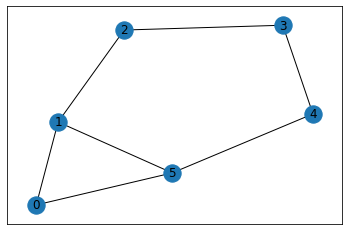

In [34]:
arco_circular1 = generar_arco_circular(arcos)
nx.draw_networkx(arco_circular1)

<b>Observaciones.</b> 
* La función <code>generar_arco_circular</code> descarta vértices aislados. De toda formas, no es demasiado habitual considerarlos.
* La función <code>generar_arco_circular</code> puede construir grafos no conexos.

### &#x1f4bb;  Actividad 5

Usar la función <code>generar_arco_circular</code> que definimos para construir el siguiente grafo arco circular.

<p><a href="https://images.app.goo.gl/pzwN7hERDhGDp6we9"><img src="https://www.researchgate.net/publication/373838311/figure/fig2/AS:11431281188042507@1694489113469/A-circular-arc-representation-for-a-graph-along-with-its-associated-drawing.png" alt="Circular-arc graph.svg" height="310" width="667"></p>

In [139]:
### Espacio para completar Actividad 5

### &#x1f4bb;  Actividad 6

<b>Definición.</b> Un grafo de intervalo es el grafo de intersección de un conjunto de intervalos en la recta numérica.

Dado un modelo de intervalos, para construir el grafo de intervalo asociado se agrega un vértice por cada intervalo del modelo y una arista entre todo par de vértices cuyos intervalos correspondientes se intersecten en la recta. Ver <a href="https://en.wikipedia.org/wiki/Interval_graph#/media/File:Interval_graph.svg">ejemplo</a>.

Implementar una función <code>generar_de_intervalo(intervalos)</code> que toma una lista de intervalos (cada intervalo se puede representar con una tupla de 2 números) y retorna el grafo de intervalo asociado.

In [140]:
### Espacio para completar Actividad 6

## Grafos aleatorios

En muchas situaciones, es útil poder generar grafos aleatorios. Por ejemplo, tenemos un programa que resuelve el problema de dominación y queremos estudiar como se comporta en grafos aleatorios. Ya hemos mencionado que NetworkX dispone de la función <code>erdos_renyi_graph(n, p)</code> para generar un grafo aleatorio de $n$ vértices y densidad aproximadamente $p$. Pero... ¿y si queremos grafos aleatorios pertenencientes a cierta clase, como orugas o arco circulares?

La respuesta no es trivial y requiere definir ciertos parámetros para la generación. A continuación presentamos algunas propuestas, pero primeramente importamos el paquete <code>random</code> que nos permitirá generar números aleatorios.

In [141]:
import random

### Grafos orugas aleatorios

Una posibilidad es que nuestro parámetro de generación sea el número $n$ de vértices del camino central. Luego, podemos generar una lista con $n$ números enteros no negativos aleatorios para indicar cuántas patas agregar a cada vértice. 
Aunque es un enfoque válido, difícilmente sea útil en la práctica porque no tenemos control sobre el número de patas, es decir, es igualmente probable que un vértice tenga 0, 20 o 1 millón de patas. 
A raíz de esta observación, también proponemos como parámetros adicionales a dos números enteros no negativos $i$ y $f$ tales que $i \leq f$ que limiten el número de patas por vértice a un número aleatorio en el intervalo $[i,f]$.

Este comportamiento es capturado por la siguiente función. Notar que la función <code>randint(i,f)</code> del paquete <code>random</code> permite generar un número entero aleatorio entre $i$ y $f$, ambos incluídos.

In [153]:
def generar_oruga_aleatorio(n,i,f):
    patas = [random.randint(i,f) for _ in range(n)]
    return generar_oruga(patas)

Probemos nuestra función.

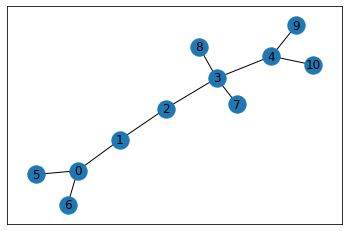

In [156]:
oruga = generar_oruga_aleatorio(5,0,3)
nx.draw_networkx(oruga)

Notar que cada vez que volvemos a ejecutar la celda de arriba, se genera un nuevo grafo oruga, muy posiblemente diferente al anterior, debido a que la función <code>randint</code> varía su salida.

Es importante mencionar que los parámetros que elegimos para la generación fueron una elección. De acuerdo a nuestras necesidades, podríamos haber incluído otros parámetros, por ejemplo, el número total patas.

### Grafos arco circulares aleatorios

De forma similar a la anterior, podemos usar como parámetros el número total $n$ de vértices y dos números reales $i$ y $f$ tales que $0 < i < f < 12$ para indicar la extensión mínima y máxima de cada intervalo (arco del círculo). Así, por cada vértice, vamos a generar un intervalo aleatorio de la siguiente forma. Primero, generamos un número real aleatorio $a$ en el intervalo $[0,12)$, que sería el inicio del intervalo. Luego, generamos un número real aleatorio $b$ en el intervalo $[i,f]$, que sería el largo del intervalo. 

Este comportamiento es capturado por la siguiente función. Notar que la función <code>uniform(i,f)</code> del paquete <code>random</code> permite generar un número de punto flotante aleatorio entre $i$ y $f$, ambos incluídos (aunque la probabilidad de que sea igual a $i$ o $f$ es casi nula, por lo que no nos preocuparemos).

In [247]:
def generar_arco_circular_aleatorio(n,i,f):
    arcos = []
    for _ in range(n):
        a = random.uniform(0,12)
        b = random.uniform(i,f)
        if a + b < 12: # Intervalo de tipo 1
            arcos.append((a,a+b))
        else: # Intervalo de tipo 2
            arcos.append((a,(a+b)-12))
    return generar_arco_circular(arcos)

Probemos nuestra función.

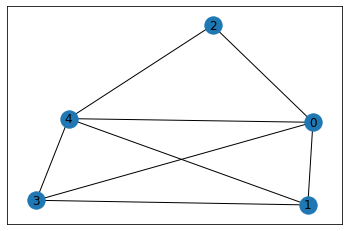

In [255]:
arco_circular = generar_arco_circular_aleatorio(5,2,6)
nx.draw_networkx(arco_circular)

Obviamente esta no es la respuesta definitiva a la generación aleatoria de grafos y, como mencionamos más arriba, podríamos necesitar incluir otros parámetros para alguna aplicación particular. Por ejemplo, ¿tendría sentido tomar como parámetro la densidad del grafo arco circular?, ¿cómo construiríamos un grafo arco circular con una densidad dada?. Estas son solo algunas preguntas que pueden aparecer y con las que probablemente tengamos que lidiar si queremos estudiar, por ejemplo, cuanto afecta la densidad del grafo de entrada a la performance de nuestro algoritmo. 

### Casos de prueba

In [ ]:
assert hay_interseccion_1_1(2,6,5,9) == True
assert hay_interseccion_1_1(2,6,1,3) == True
assert hay_interseccion_1_1(2,6,7,9) == False
assert hay_interseccion_1_1(7,9,2,6) == False

assert hay_interseccion_1_2(2,6,9,3) == True
assert hay_interseccion_1_2(2,6,9,8) == True
assert hay_interseccion_1_2(2,6,11,1) == False

assert hay_interseccion(2,6,1,3) == True
assert hay_interseccion(10,4,11,1) == True
assert hay_interseccion(11,5,8,10) == False
assert hay_interseccion(11,5,4,10) == True